In [1]:
import numpy as np
import pandas as pd
import math
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Master Data Sets.ipynb")
from matplotlib import pyplot as plt
from ast import literal_eval
from sklearn.metrics.pairwise import haversine_distances
import itertools
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
train_cust =pd.read_csv('train_customers.csv',parse_dates=['created_at','updated_at'])
test_cust =pd.read_csv('test_customers.csv',parse_dates=['created_at','updated_at'])
train_loc =pd.read_csv('train_locations.csv')
test_loc =pd.read_csv('test_locations.csv')
vendors =pd.read_csv('vendors.csv',parse_dates=['created_at','updated_at'])
orders =pd.read_csv('orders.csv',parse_dates=['created_at','delivery_date'])
submission =pd.read_csv('SampleSubmission.csv')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 200)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (15,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train_cust= train_cust.rename({'akeed_customer_id': 'customer_id'}, axis=1)
test_cust= test_cust.rename({'akeed_customer_id': 'customer_id'}, axis=1)

In [4]:
test_cust = test_cust.drop_duplicates(subset='customer_id', keep="first")
train_cust = train_cust.drop_duplicates(subset='customer_id', keep="first")

In [5]:
train =pd.merge(train_loc, train_cust, on ='customer_id', how ='left')
test =pd.merge(test_loc, test_cust, on ='customer_id', how ='left')

In [6]:
test.shape

(16720, 12)

In [7]:
test1= test[['customer_id','location_number']]
train1= train[['customer_id','location_number']]
vendors1= vendors[['id']]
vendors1.head()


,id
0,4
1,13
2,20
3,23
4,28


In [8]:
test=test1.assign(key=1).merge(vendors1.assign(key=1), on='key').drop('key',axis=1)
train=train1.assign(key=1).merge(vendors1.assign(key=1), on='key').drop('key',axis=1)

In [9]:
test.head(10)

,customer_id,location_number,id
0,Z59FTQD,0,4
1,Z59FTQD,0,13
2,Z59FTQD,0,20
3,Z59FTQD,0,23
4,Z59FTQD,0,28
5,Z59FTQD,0,33
6,Z59FTQD,0,43
7,Z59FTQD,0,44
8,Z59FTQD,0,55
9,Z59FTQD,0,66


In [10]:
test.shape

(1672000, 3)

In [11]:
#test.to_csv('Master_test')
#train.to_csv('Master_train')

In [12]:
submission.shape

(1672000, 2)

In [13]:
test1= test[['customer_id','location_number']]
train1= train[['customer_id','location_number']]
vendors1= vendors[['id']]
vendors1.head()

test['id_obj']=test['id'].astype(str)
train['id_obj']=train['id'].astype(str)

In [14]:
test['location_number_obj']=test['location_number'].astype(str)
train['location_number_obj']=train['location_number'].astype(str)
vendors['id_obj']=vendors['id'].astype(str)

In [15]:
test['CID X LOC_NUM X VENDOR'] = test['customer_id'] +' X '+ test['location_number_obj'] +' X '+ test['id_obj']
train['CID X LOC_NUM X VENDOR'] = train['customer_id'] +' X '+ train['location_number_obj'] +' X '+ train['id_obj']

In [16]:
c4 = pd.Series(submission['CID X LOC_NUM X VENDOR'])
c5= pd.Series(test['CID X LOC_NUM X VENDOR'])
c5.append(c4)

0            Z59FTQD X 0 X 4
1           Z59FTQD X 0 X 13
2           Z59FTQD X 0 X 20
3           Z59FTQD X 0 X 23
4           Z59FTQD X 0 X 28
                 ...        
1671995    L9G4OFV X 4 X 907
1671996    L9G4OFV X 5 X 907
1671997    FDZFYBA X 0 X 907
1671998    UTKHR1C X 0 X 907
1671999    3O8LSR3 X 0 X 907
Name: CID X LOC_NUM X VENDOR, Length: 3344000, dtype: object

In [17]:
c5.unique()
c6=set(c5)
print(len(c6))

1672000


In [18]:
train =pd.merge(train, orders, on ='CID X LOC_NUM X VENDOR', how ='left')

In [19]:
train.shape

(6005461, 31)

In [20]:
train.head()

,customer_id_x,location_number,id,id_obj,location_number_obj,CID X LOC_NUM X VENDOR,akeed_order_id,customer_id_y,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
0,02SFNJH,0,4,4,0,02SFNJH X 0 X 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
1,02SFNJH,0,13,13,0,02SFNJH X 0 X 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
2,02SFNJH,0,20,20,0,02SFNJH X 0 X 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
3,02SFNJH,0,23,23,0,02SFNJH X 0 X 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
4,02SFNJH,0,28,28,0,02SFNJH X 0 X 28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN


In [21]:
print(train[train['akeed_order_id'].notnull()])

        customer_id_x  location_number   id id_obj location_number_obj  \
143           02SFNJH                1  192    192                   1   
148           02SFNJH                1  199    199                   1   
196           02SFNJH                1  855    855                   1   
235           02SFNJH                2  159    159                   2   
397           RU43CXC                0  856    856                   0   
...               ...              ...  ...    ...                 ...   
6005372       HWELAU8                1   75     75                   1   
6005401       HWELAU8                1  188    188                   1   
6005402       HWELAU8                1  189    189                   1   
6005420       HWELAU8                1  259    259                   1   
6005424       HWELAU8                1  288    288                   1   

        CID X LOC_NUM X VENDOR  akeed_order_id customer_id_y  item_count  \
143          02SFNJH X 1 X 192     

In [22]:
orders.shape

(135303, 26)

In [23]:
train['customer_id_x'].value_counts()

4Y0K8NQ    3038
NETYQ1C    2602
5EP9F62    2008
4UZKXW2    1909
YYKZN0F    1905
           ... 
VUO2833     100
BNET3NG     100
QLTM7Q6     100
A3Y5QKU     100
LTKI0H7     100
Name: customer_id_x, Length: 35400, dtype: int64

In [24]:
orders.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [25]:
orders['customer_id'].value_counts(normalize=True)

XW90EAP    0.001936
TL7Z2DM    0.001116
VDEJEMP    0.001079
HJFTTGW    0.000946
B28LJKM    0.000880
             ...   
T1A229S    0.000007
TCPPV08    0.000007
5X6PD5X    0.000007
8JFLNDF    0.000007
ZKDE4IZ    0.000007
Name: customer_id, Length: 27445, dtype: float64

In [26]:
cust_freq=orders['customer_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
cust_freq1=orders['customer_id'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='normalised')

In [27]:
cust_freq =pd.merge(cust_freq, cust_freq1, on ='unique_values', how ='left')

In [28]:
cust_freq

,unique_values,counts,normalised
0,XW90EAP,262,0.001936
1,TL7Z2DM,151,0.001116
2,VDEJEMP,146,0.001079
3,HJFTTGW,128,0.000946
4,B28LJKM,119,0.000880
...,...,...,...
27440,T1A229S,1,0.000007
27441,TCPPV08,1,0.000007
27442,5X6PD5X,1,0.000007
27443,8JFLNDF,1,0.000007


In [29]:
cust_freq.describe()

,counts,normalised
count,27445.000000,27445.000000
mean,4.929969,0.000036
std,7.621525,0.000056
min,1.000000,0.000007
25%,1.000000,0.000007
50%,2.000000,0.000015
75%,5.000000,0.000037
max,262.000000,0.001936


In [30]:
vend_freq=orders['vendor_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vend_freq1=orders['vendor_id'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='normalised')
vend_freq =pd.merge(vend_freq, vend_freq1, on ='unique_values', how ='left')
vend_freq

,unique_values,counts,normalised
0,113,7807,0.057700
1,105,5562,0.041108
2,79,5117,0.037819
3,84,5001,0.036961
4,78,4643,0.034316
5,83,3684,0.027228
6,386,3280,0.024242
7,86,2837,0.020968
8,846,2559,0.018913
9,106,2263,0.016725


In [31]:
vend_freq.describe()

,unique_values,counts,normalised
count,100.000000,100.00000,100.000000
mean,288.840000,1353.03000,0.010000
std,242.299994,1178.32182,0.008709
min,4.000000,474.00000,0.003503
25%,105.750000,730.50000,0.005399
50%,202.000000,941.00000,0.006955
75%,387.250000,1529.50000,0.011304
max,907.000000,7807.00000,0.057700


In [32]:
CLV_freq=orders['CID X LOC_NUM X VENDOR'].value_counts().rename_axis('unique_values').reset_index(name='counts')
CLV_freq1=orders['CID X LOC_NUM X VENDOR'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='normalised')
CLV_freq =pd.merge(CLV_freq, CLV_freq1, on ='unique_values', how ='left')
CLV_freq 

,unique_values,counts,normalised
0,XW90EAP X 3 X 13,69,0.000510
1,XW90EAP X 0 X 13,68,0.000503
2,KXXRD9J X 2 X 157,62,0.000458
3,3W4JVGN X 1 X 303,61,0.000451
4,TVSPG2H X 0 X 43,51,0.000377
...,...,...,...
80137,GTBW4VJ X 0 X 81,1,0.000007
80138,TH3V715 X 0 X 195,1,0.000007
80139,0IDUDPL X 0 X 78,1,0.000007
80140,0IBXAM0 X 4 X 75,1,0.000007


In [33]:
CLV_freq.describe()

,counts,normalised
count,80142.000000,80142.000000
mean,1.688291,0.000012
std,1.820141,0.000013
min,1.000000,0.000007
25%,1.000000,0.000007
50%,1.000000,0.000007
75%,2.000000,0.000015
max,69.000000,0.000510


In [34]:
c7= pd.Series(orders['CID X LOC_NUM X VENDOR'])
c7.unique()
c8=set(c7)
print(len(c8))

80142


In [35]:
#Genger distribution of train customers
train_cust['gender']=train_cust['gender'].str.lower()
train_gender=train_cust['gender'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
train_gender


,unique_values,counts
0,male,20578
1,NaN,12154
2,female,1761
3,female,13
4,male,9
5,female,2
6,?????,2
7,female,2
8,female,1
9,,1


In [36]:
train_gender['string_len']=len(train_gender['unique_values'])
train_gender

,unique_values,counts,string_len
0,male,20578,10
1,NaN,12154,10
2,female,1761,10
3,female,13,10
4,male,9,10
5,female,2,10
6,?????,2,10
7,female,2,10
8,female,1,10
9,,1,10


In [37]:
#Gender distribution of test customers.
test_cust['gender']=test_cust['gender'].str.lower()
test_gender=test_cust['gender'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
test_gender

,unique_values,counts
0,male,5783
1,NaN,3447
2,female,514
3,female,6
4,female,2
5,male,1


In [38]:
#Location type distribution of train customers 
train_loctyp=train_loc['location_type'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
train_loctyp

,unique_values,counts
0,NaN,27209
1,Home,19703
2,Work,6441
3,Other,6150


In [39]:
#Location type distribution of test customers
test_loctyp=test_loc['location_type'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
test_loctyp

,unique_values,counts
0,NaN,7650
1,Home,5504
2,Work,1793
3,Other,1773


In [40]:
#Vendor category 
vendor_cat=vendors['vendor_category_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_cat['unique_values'][0]="Restaurant"
vendor_cat['unique_values'][1]="Sweets & Bakes"
vendor_cat

<ipython-input-40-1b2a70736749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_cat['unique_values'][0]="Restaurant"
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-40-1b2a70736749>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_cat['unique_values'][1]="Sweets & Bakes"


,unique_values,counts
0,Restaurant,89
1,Sweets & Bakes,11


In [41]:
#Delivery charge frequency
delivery_chrg=vendors['delivery_charge'].value_counts().rename_axis('unique_values').reset_index(name='counts')
delivery_chrg

,unique_values,counts
0,0.7,59
1,0.0,41


   unique_values  counts
0           15.0      57
1           10.0      12
2            5.0      10
3            8.0       8
4            6.0       8
5           12.0       1
6            3.0       1
7            7.0       1
8           14.0       1
9            2.0       1


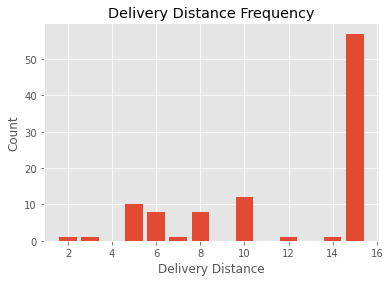

In [98]:
#Delivery distance frequency 
delivery_dist=vendors['serving_distance'].value_counts().rename_axis('unique_values').reset_index(name='counts')
delivery_dist.sort_values(by='unique_values', ascending=True)
x=delivery_dist['unique_values']
y=delivery_dist['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Delivery Distance Frequency")
plt.xlabel("Delivery Distance")
plt.ylabel("Count")
plt.show
print(delivery_dist)

    unique_values  counts
0              15      36
1              10      25
2              14       7
3              17       6
4              13       5
5              11       5
6              16       4
7              20       3
8              19       2
9              18       2
10             12       2
11             45       1
12             21       1
13              5       1


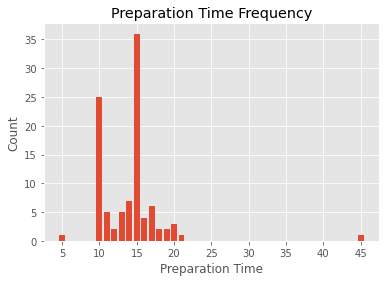

In [99]:
#prepration_time analysis
vendor_prep_time=vendors['prepration_time'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_prep_time.sort_values(by='unique_values', ascending=True)
x=vendor_prep_time['unique_values']
y=vendor_prep_time['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Preparation Time Frequency")
plt.xlabel("Preparation Time")
plt.ylabel("Count")
plt.show
print(vendor_prep_time)

In [44]:
#discount_percentage analysis
vendor_discount_percentage=vendors['discount_percentage'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_discount_percentage.sort_values(by='unique_values', ascending=True)

,unique_values,counts
0,0.0,96
4,10.0,1
1,15.0,1
2,35.0,1
3,50.0,1


    unique_values  counts
0             4.5      19
1             4.3      18
2             4.2      15
3             4.4      14
4             4.6      10
5             4.7       7
6             4.0       6
7             4.1       5
8             3.8       2
9             4.8       2
10            3.2       1
11            3.7       1


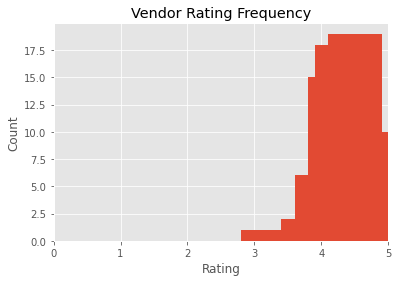

In [106]:
#vendor_rating analysis
vendor_rating=vendors['vendor_rating'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_rating.sort_values(by='unique_values', ascending=True)
x=vendor_rating['unique_values']
y=vendor_rating['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Vendor Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xlim(0,5)
plt.show
print(vendor_rating)

    unique_values  counts
0             2.0   41921
1             1.0   40951
2             3.0   23349
3             4.0   11084
4             5.0    5280
5             6.0    2660
6             7.0    1333
7             8.0     716
8             9.0     370
9            10.0     268
10           11.0     151
11           12.0      99
12           13.0      57
13           14.0      33
14           17.0      19
15           15.0      19
16           16.0      18
17           20.0      11
18           18.0       7
19           19.0       6
20           22.0       4
21           25.0       3
22           21.0       3
23           30.0       2
24           28.0       2
25           41.0       2
26           27.0       2
27           38.0       1
28           26.0       1
29           34.0       1
30           24.0       1
31           47.0       1
32           68.0       1
33           33.0       1
34           40.0       1


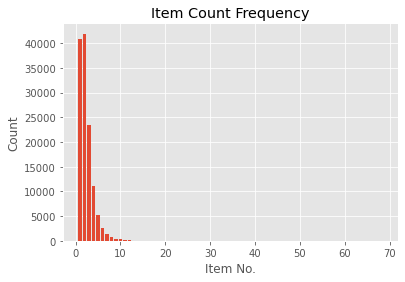

In [110]:
#item_count analysis
order_item_count=orders['item_count'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_item_count.sort_values(by='unique_values', ascending=True)
x=order_item_count['unique_values']
y=order_item_count['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Item Count Frequency")
plt.xlabel("Item No.")
plt.ylabel("Count")
plt.show
print(order_item_count)

      unique_values  counts
0               9.5    2741
1              10.1    2726
2               8.4    2697
3               6.8    2662
4               9.0    2522
...             ...     ...
1043          174.6       1
1044          109.8       1
1045           94.3       1
1046           56.2       1
1047          108.6       1

[1048 rows x 2 columns]


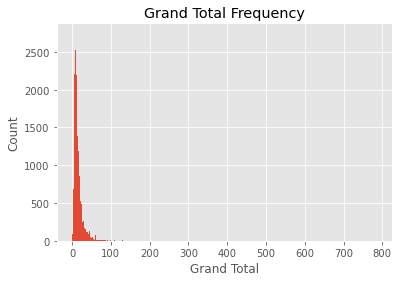

In [111]:
#grand_total analysis
order_grand_total=orders['grand_total'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_grand_total.sort_values(by='unique_values', ascending=True)
x=order_grand_total['unique_values']
y=order_grand_total['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Grand Total Frequency")
plt.xlabel("Grand Total")
plt.ylabel("Count")
plt.show
print(order_grand_total)

In [113]:
len(orders)

135303

In [48]:
order_grand_total.describe()

,counts
count,10.000000
mean,13530.300000
std,42572.972183
min,0.000000
25%,0.000000
50%,1.000000
75%,19.000000
max,134694.000000


In [49]:
#pd.qcut(order_grand_total['unique_values'], q=4)

   unique_values  counts
0              1  104714
1              2   22079
2              4    6696
3              3    1361
4              5     453


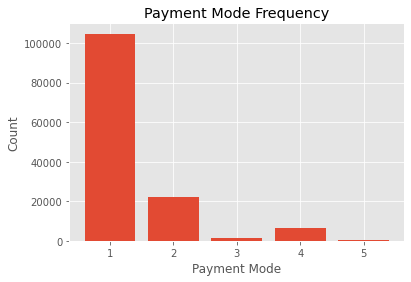

In [114]:
#payment_mode analysis
order_payment_mode=orders['payment_mode'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_payment_mode.sort_values(by='unique_values', ascending=True)
x=order_payment_mode['unique_values']
y=order_payment_mode['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Payment Mode Frequency")
plt.xlabel("Payment Mode")
plt.ylabel("Count")
plt.show
print(order_payment_mode)

In [51]:
#frequency of customer orders analysis
order_cust_freq=orders['customer_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_cust_freq.sort_values(by='unique_values', ascending=True)

,unique_values,counts
18826,000THBA,1
24045,002510Y,1
15884,005ECL6,2
18063,0075AM7,1
8859,009UFS1,4
...,...,...
16078,ZZVGIVK,2
2734,ZZVLIB5,12
25457,ZZWKMGG,1
4084,ZZY3N0D,9


In [52]:
order_cust_freq.describe()

,counts
count,27445.000000
mean,4.929969
std,7.621525
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,262.000000


In [53]:
#frequency of vendor orders analysis
order_ven_freq=orders['vendor_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_ven_freq.sort_values(by='unique_values', ascending=True)

,unique_values,counts
10,4,2137
73,13,731
22,20,1587
50,23,920
24,28,1537
14,33,1938
39,43,1083
29,44,1417
70,55,751
90,66,592


In [54]:
order_ven_freq.describe()

,unique_values,counts
count,100.000000,100.00000
mean,288.840000,1353.03000
std,242.299994,1178.32182
min,4.000000,474.00000
25%,105.750000,730.50000
50%,202.000000,941.00000
75%,387.250000,1529.50000
max,907.000000,7807.00000


      unique_values  counts
1              9.16     188
2              9.23     164
3              9.61     162
4              9.17     159
5              8.44     158
...             ...     ...
1508          17.20       1
1509          16.64       1
1510           0.17       1
1511          15.11       1
1512          16.26       1

[1512 rows x 2 columns]


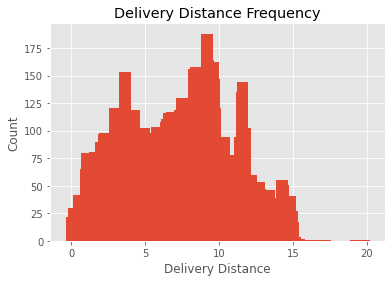

In [121]:
#Delivery distance frequency 
delivery_dist_orders=orders['deliverydistance'].value_counts().rename_axis('unique_values').reset_index(name='counts')
delivery_dist_orders.sort_values(by='unique_values', ascending=True)
delivery_dist_orders=delivery_dist_orders[delivery_dist_orders['unique_values']>0]
x=delivery_dist_orders['unique_values']
y=delivery_dist_orders['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Delivery Distance Frequency")
plt.xlabel("Delivery Distance")
plt.ylabel("Count")
plt.show
print(delivery_dist_orders)

    unique_values  counts
0            45.0   23692
1            40.0   19865
2            35.0   13801
3            50.0   11901
4            55.0    4065
5            30.0    3617
6            60.0    1815
7            65.0     683
8            70.0     161
9            25.0      60
10           75.0      51
11           80.0      19
12           85.0      10
13           90.0       3


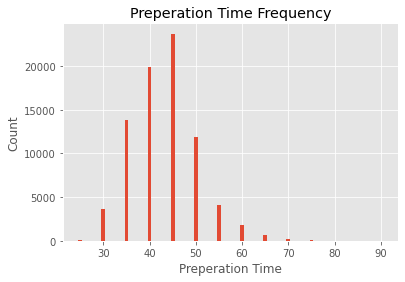

In [122]:
#Preperation time frequency 
prep_time_orders=orders['preparationtime'].value_counts().rename_axis('unique_values').reset_index(name='counts')
prep_time_orders.sort_values(by='unique_values', ascending=True)
x=prep_time_orders['unique_values']
y=prep_time_orders['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Preperation Time Frequency")
plt.xlabel("Preperation Time")
plt.ylabel("Count")
plt.show
print(prep_time_orders)

In [57]:
#vendor_tag=pd.DataFrame(columns=['vendor_id','vendor_tag'])
#v=np.ndarray(shape=(100,10))
#i=0
#j=0
#for i in range (0,4):
    #v[j][i]=literal_eval(vendors['vendor_tag'][i],)
   # g=literal_eval(vendors['vendor_tag'][i],)
   # print(len(g))
   # vs=len(g)
   # for j in range (0,10):
        #vendor_tag1=({'vendor_id':vendors['id'][i],'vendor_tag':g[i]})
        #vendor_tag.append(vendor_tag1,ignore_index=True)
#vendor_tag



#vendor_tag=pd.DataFrame(columns=['vendor_id','vendor_tag'])
#vendor_temp=vendors[['id','vendor_tag']]
#delivery_chrg=vendors['delivery_charge'].value_counts().rename_axis('unique_values').reset_index(name='counts')
#delivery_chrg


    #v[0].append(literal_eval(vendors['vendor_tag'][i])) 

In [58]:
vendor_tag=vendors[['id','vendor_tag','vendor_tag_name']]
vendor_tag['tags'] = vendor_tag['vendor_tag_name'].str.split(",")
vendor_temp=pd.melt(vendor_tag,id_vars=['id'], value_vars=['tags'])
vendor_temp

<ipython-input-58-47c03a94dd53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_tag['tags'] = vendor_tag['vendor_tag_name'].str.split(",")


,id,variable,value
0,4,tags,"[Arabic, Breakfast, Burgers, Desserts, Free De..."
1,13,tags,"[Breakfast, Cakes, Crepes, Italian, Pasta, Piz..."
2,20,tags,"[Breakfast, Desserts, Free Delivery, Indian]"
3,23,tags,"[Burgers, Desserts, Fries, Salads]"
4,28,tags,[Burgers]
5,33,tags,"[Desserts, Mexican]"
6,43,tags,"[American, Burgers, Fries, Sandwiches]"
7,44,tags,"[American, Burgers, Fries, Sandwiches]"
8,55,tags,"[Breakfast, Desserts, Grills, Milkshakes, Sala..."
9,66,tags,"[Breakfast, Burgers, Desserts, Indian, Salads]"


In [59]:
q=pd.DataFrame({vendor_tag['id'][0]:vendor_tag['tags'][0]},)
for i in range (1,100):
    q[vendor_tag['id'][i]]=pd.Series(vendor_tag['tags'][i])
q

,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,188,189,191,192,193,195,196,197,199,201,203,207,216,221,225,231,237,243,250,259,265,271,274,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907
0,Arabic,Breakfast,Breakfast,Burgers,Burgers,Desserts,American,American,Breakfast,Breakfast,Breakfast,Asian,Sandwiches,Pizzas,Burgers,Arabic,Breakfast,Breakfast,Burgers,Desserts,Cakes,American,Asian,American,American,American,Asian,Arabic,Desserts,Burgers,Arabic,Breakfast,Arabic,American,Biryani,American,American,Burgers,Breakfast,Arabic,Italian,Sandwiches,Fresh Juices,Fresh Juices,Arabic,Burgers,NaN,Free Delivery,Cakes,Biryani,American,Arabic,Coffee,Fresh Juices,Breakfast,NaN,American,NaN,American,American,Desserts,American,Cakes,Asian,American,Burgers,Coffee,Free Delivery,Combos,Coffee,Coffee,American,Bagels,American,Churros,American,Omani,Frozen yoghurt,Arabic,Burgers,American,Fresh Juices,Burgers,Coffee,Burgers,Fresh Juices,Fresh Juices,Fresh Juices,Biryani,Biryani,Biryani,American,American,American,American,American,American,American,American,Fatayers
1,Breakfast,Cakes,Desserts,Desserts,NaN,Mexican,Burgers,Burgers,Desserts,Burgers,Desserts,Desserts,Breakfast,Italian,Desserts,Breakfast,Desserts,Desserts,Fries,Omani,Crepes,Burgers,Fresh Juices,Burgers,Burgers,Burgers,Dimsum,Desserts,Free Delivery,Healthy Food,Pizzas,Burgers,NaN,Burgers,Desserts,Burgers,Burgers,Desserts,Desserts,Grills,Pasta,Shawarma,Milkshakes,Milkshakes,Burgers,Fries,NaN,Mexican,Crepes,Desserts,Sandwiches,Biryani,Organic,Healthy Food,Free Delivery,NaN,Burgers,NaN,Breakfast,Burgers,Free Delivery,Burgers,Donuts,Desserts,Burgers,Desserts,Fresh Juices,Fresh Juices,Fries,Fresh Juices,Fresh Juices,Breakfast,Desserts,Kids meal,NaN,Breakfast,Arabic,Smoothies,Kushari,Free Delivery,Burgers,Lebanese,Desserts,Pancakes,Desserts,Sandwiches,Sandwiches,Sandwiches,Desserts,Desserts,Desserts,Breakfast,Breakfast,Breakfast,Breakfast,Breakfast,Burgers,Breakfast,Breakfast,Mojitos
2,Burgers,Crepes,Free Delivery,Fries,NaN,NaN,Fries,Fries,Grills,Desserts,Grills,Healthy Food,Burgers,Breakfast,Free Delivery,Desserts,Lebanese,Salads,Kids meal,NaN,Desserts,Desserts,Kids meal,Free Delivery,Free Delivery,Free Delivery,Grills,Free Delivery,Healthy Food,Milkshakes,Sandwiches,Grills,NaN,Mishkak,Indian,Sandwiches,Kids meal,Pastry,Grills,Indian,Pizzas,Fresh Juices,Mojitos,Mojitos,Sandwiches,Grills,NaN,Salads,Desserts,Indian,Hot Dogs,Chinese,NaN,Smoothies,Fresh Juices,NaN,Desserts,NaN,Rolls,Kids meal,Fresh Juices,Kids meal,NaN,Rice,Fries,Free Delivery,Hot Chocolate,Pastas,Mojitos,Hot Chocolate,Hot Chocolate,Burgers,Salads,Pasta,NaN,Burgers,Shuwa,NaN,Sandwiches,Milkshakes,Desserts,Sandwiches,Free Delivery,Spanish Latte,Family Meal,Shawarma,Shawarma,Shawarma,Indian,Indian,Indian,Burgers,Burgers,Burgers,Burgers,Burgers,Desserts,Burgers,Burgers,Sandwiches
3,Desserts,Italian,Indian,Salads,NaN,NaN,Sandwiches,Sandwiches,Milkshakes,Indian,Milkshakes,Japanese,Mojitos,Soups,Pasta,Mandazi,Manakeesh,Arabic,Shawarma,NaN,Donuts,Mojitos,NaN,Hot Dogs,Hot Dogs,Hot Dogs,Japanese,Indian,Sweets,Sandwiches,NaN,Pizza,NaN,Salads,Rice,NaN,Sandwiches,Pizzas,Milkshakes,Pasta,Salads,Mojitos,Sandwiches,Sandwiches,Shawarma,Mishkak,NaN,NaN,Donuts,Soups,Fries,Grills,NaN,NaN,Fries,NaN,Donuts,NaN,Salads,Pasta,Healthy Food,Pasta,NaN,Salads,Mojitos,Grills,Sandwiches,Salads,Pasta,Sandwiches,Sandwiches,Fries,NaN,Pizzas,NaN,Desserts,Pasta,NaN,NaN,Mojitos,Free Delivery,Shawarma,Pasta,Waffles,Salads,NaN,NaN,NaN,Kebabs,Kebabs,Kebabs,Cafe,Cafe,Cafe,Cafe,Cafe,Free Delivery,Cafe,Cafe,NaN
4,Free Delivery,Pasta,NaN,NaN,NaN,NaN,NaN,NaN,Salads,Salads,Salads,Salads,NaN,Pasta,Sandwiches,Omani,Pizzas,NaN,NaN,NaN,Fresh Juices,Pasta,NaN,Pasta,Pasta,Pasta,Rice,NaN,NaN,Steaks,NaN,Sandwiches,NaN,Sandwiches,Thali,NaN,NaN,NaN,Salads,Salads,Sandwiches,Milkshakes,Shawarma,Shawarma,

In [60]:
n=pd.melt(q, value_vars=[4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,188,189,191,192,193,195,196,197,199,201,203,207,216,221,225,231,237,243,250,259,265,271,274,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907])
#for i in z:
    #n.append(pd.melt(q, value_vars=[i]))  
    
#n.shape
n

,variable,value
0,4,Arabic
1,4,Breakfast
2,4,Burgers
3,4,Desserts
4,4,Free Delivery
...,...,...
995,907,NaN
996,907,NaN
997,907,NaN
998,907,NaN


In [61]:
n = n[n['value'].notna()]

In [62]:
n

,variable,value
0,4,Arabic
1,4,Breakfast
2,4,Burgers
3,4,Desserts
4,4,Free Delivery
...,...,...
988,858,Kids meal
989,858,Salads
990,907,Fatayers
991,907,Mojitos


In [63]:
n1=n['value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
n1.sort_values(by='counts', ascending=False)

,unique_values,counts
0,Desserts,44
1,Sandwiches,42
2,Burgers,40
3,Salads,33
4,American,27
5,Breakfast,24
6,Free Delivery,24
7,Fries,20
8,Fresh Juices,17
9,Pasta,16


In [64]:
custid=pd.Series(orders['customer_id'])
venid=pd.Series(orders['vendor_id'])
bv1=pd.DataFrame({'customer_id':custid,'vendor':venid})
bv1['vendor']=bv1['vendor'].apply(str)
fbv1=(bv1.groupby('customer_id').vendor.agg([('count', 'count'), ('vendor', ', '.join)])
   .reset_index())

In [65]:
ebv1 = bv1
ebv1 = bv1.drop_duplicates( keep="first")
ebv1['vendor']=bv1['vendor'].apply(str)
efbv1=(ebv1.groupby('customer_id').vendor.agg([('vendor', ', '.join),('count', 'count')])
   .reset_index())
efbv1

<ipython-input-65-3322f62e493a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebv1['vendor']=bv1['vendor'].apply(str)


,customer_id,vendor,count
0,000THBA,148,1
1,002510Y,157,1
2,005ECL6,237,1
3,0075AM7,145,1
4,009UFS1,"193, 83, 304, 84",4
...,...,...,...
27440,ZZVGIVK,"78, 79",2
27441,ZZVLIB5,"110, 221, 23, 225",4
27442,ZZWKMGG,192,1
27443,ZZY3N0D,"85, 189, 86, 225, 459, 356, 419, 537",8


In [66]:
fbv1.to_csv('fbv1.csv')

In [67]:
#customer order count
fbv1.sort_values(by='count', ascending=False)

,customer_id,count,vendor
25804,XW90EAP,262,"4, 13, 33, 159, 13, 13, 13, 13, 13, 13, 13, 33..."
22564,TL7Z2DM,151,"75, 20, 75, 75, 75, 75, 75, 113, 78, 75, 106, ..."
23909,VDEJEMP,146,"20, 221, 300, 81, 81, 81, 300, 300, 300, 4, 30..."
13319,HJFTTGW,128,"159, 159, 4, 176, 159, 159, 159, 104, 104, 104..."
8431,B28LJKM,119,"192, 92, 4, 134, 159, 303, 92, 192, 33, 4, 110..."
...,...,...,...
13486,HRBMGRJ,1,33
13487,HRCVHZO,1,161
13489,HROTEYJ,1,849
13490,HRPUOKP,1,189


In [68]:
#
#
#
#    Customer Profile
#
#
#
cfbv1 =pd.merge(fbv1, efbv1, on ='customer_id', how ='left')
cfbv1

,customer_id,count_x,vendor_x,vendor_y,count_y
0,000THBA,1,148,148,1
1,002510Y,1,157,157,1
2,005ECL6,2,"237, 237",237,1
3,0075AM7,1,145,145,1
4,009UFS1,4,"193, 83, 304, 84","193, 83, 304, 84",4
...,...,...,...,...,...
27440,ZZVGIVK,2,"78, 79","78, 79",2
27441,ZZVLIB5,12,"110, 110, 110, 110, 110, 221, 23, 110, 110, 11...","110, 221, 23, 225",4
27442,ZZWKMGG,1,192,192,1
27443,ZZY3N0D,9,"85, 189, 189, 86, 225, 459, 356, 419, 537","85, 189, 86, 225, 459, 356, 419, 537",8


In [69]:
def most_frequent(List): 
    counter = 0
    jj='0,'+List
    j=literal_eval(jj)
    num = j[0] 
    ctr=[]
    venc=[]
      
    for i in j: 
        curr_frequency = j.count(i) 
        if(curr_frequency>= counter): 
            counter = curr_frequency 
            num = i 
            ctr.append(curr_frequency)
            venc.append(i)
    tdf=pd.DataFrame({"vendor":venc,"ctr":ctr})
    tdf=tdf[tdf['ctr']==counter]
    tdf=tdf[tdf['vendor']!=0]
    tdf= tdf.drop_duplicates(subset='vendor', keep="first")
    tdf1=list(tdf['vendor'])
    tdf2=','.join(str(e) for e in tdf1)
    
    return tdf2 
#for i in range (0,27445):
cfbv1['Pop_v']=most_frequent(cfbv1['vendor_x'])
cfbv1

ValueError: malformed node or string: 0                                                    0,148
1                                                    0,157
2                                               0,237, 237
3                                                    0,145
4                                       0,193, 83, 304, 84
                               ...                        
27440                                             0,78, 79
27441    0,110, 110, 110, 110, 110, 221, 23, 110, 110, ...
27442                                                0,192
27443          0,85, 189, 189, 86, 225, 459, 356, 419, 537
27444                                                0,243
Name: vendor_x, Length: 27445, dtype: object

In [70]:

type(cfbv1['vendor_x'][2])

str

In [71]:

cfbv1


,customer_id,count_x,vendor_x,vendor_y,count_y
0,000THBA,1,148,148,1
1,002510Y,1,157,157,1
2,005ECL6,2,"237, 237",237,1
3,0075AM7,1,145,145,1
4,009UFS1,4,"193, 83, 304, 84","193, 83, 304, 84",4
...,...,...,...,...,...
27440,ZZVGIVK,2,"78, 79","78, 79",2
27441,ZZVLIB5,12,"110, 110, 110, 110, 110, 221, 23, 110, 110, 11...","110, 221, 23, 225",4
27442,ZZWKMGG,1,192,192,1
27443,ZZY3N0D,9,"85, 189, 189, 86, 225, 459, 356, 419, 537","85, 189, 86, 225, 459, 356, 419, 537",8


In [72]:
cfbv1.iloc[1,2]

'157'

In [73]:
js=list(filter(lambda a: a !=gh , j))
js

NameError: name 'j' is not defined

In [74]:
cfbv1.iloc[27441,2]

'110, 110, 110, 110, 110, 221, 23, 110, 110, 110, 110, 225'

In [75]:
gh=110

In [76]:
#vendor with most order
bv2=orders['vendor_id'].value_counts().rename_axis('vendor_id').reset_index(name='counts')
bv2.sort_values(by='counts', ascending=False)


,vendor_id,counts
0,113,7807
1,105,5562
2,79,5117
3,84,5001
4,78,4643
5,83,3684
6,386,3280
7,86,2837
8,846,2559
9,106,2263


In [77]:
bv22=pd.DataFrame(orders['vendor_id'])
bv22

,vendor_id
0,105
1,294
2,83
3,90
4,83
...,...
135298,67
135299,79
135300,28
135301,841


In [78]:
#bv2['vendor_id']=bv2['vendor_id'].apply(str)
#bv2 = bv2.drop_duplicates(subset='vendor_id', keep="first")
#vendor_tag2['vendor_id']=vendor_tag2['vendor_id'].apply(str)
#vendor_tag2 = vendor_tag2.drop_duplicates(subset='vendor_id', keep="first")
#fbv2=pd.merge(bv2, vendor_tag2, on ='vendor_id', how ='left')

In [79]:
y=n
y= y.rename({'variable': 'vendor_id'}, axis=1)
fbv2=pd.merge(bv22, y, on ='vendor_id', how ='left')
fbv2

,vendor_id,value
0,105,American
1,105,Burgers
2,105,Free Delivery
3,105,Hot Dogs
4,105,Pasta
...,...,...
693415,79,Burgers
693416,79,Desserts
693417,79,Free Delivery
693418,79,Pasta


In [80]:
#most popular tag
pop_tag=fbv2['value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
pop_tag.sort_values(by='counts', ascending=False)

,unique_values,counts
0,Desserts,66182
1,Burgers,59190
2,Sandwiches,49080
3,Free Delivery,43057
4,Salads,37227
5,American,34813
6,Pasta,30190
7,Breakfast,30003
8,Fries,25133
9,Fresh Juices,20862


In [81]:
loc_train_cust=train_loc[['customer_id','location_number','latitude','longitude']]
loc_train_cust['location_number_obj']=loc_train_cust['location_number'].astype(str)
loc_train_cust['CID X LOC_NUM'] = loc_train_cust['customer_id'] +' X '+ loc_train_cust['location_number_obj']
loc_train_cust

,customer_id,location_number,latitude,longitude,location_number_obj,CID X LOC_NUM
0,02SFNJH,0,1.682392,-78.789737,0,02SFNJH X 0
1,02SFNJH,1,1.679137,0.766823,1,02SFNJH X 1
2,02SFNJH,2,-0.498648,0.661241,2,02SFNJH X 2
3,RU43CXC,0,0.100853,0.438165,0,RU43CXC X 0
4,BDFBPRD,0,2.523125,0.733464,0,BDFBPRD X 0
...,...,...,...,...,...,...
59498,9PP42SA,2,-0.788515,-78.497721,2,9PP42SA X 2
59499,9PP42SA,3,-1.445114,0.072558,3,9PP42SA X 3
59500,9PP42SA,4,-0.001785,0.431695,4,9PP42SA X 4
59501,HWELAU8,0,-0.066291,-78.583075,0,HWELAU8 X 0


In [82]:
loc_vend=vendors[['id','latitude','longitude','serving_distance']]
loc_vend=loc_vend.rename({'id': 'vendor_id'}, axis=1)
loc_vend

,vendor_id,latitude,longitude,serving_distance
0,4,-0.588596,0.754434,6.0
1,13,-0.471654,0.744470,5.0
2,20,-0.407527,0.643681,8.0
3,23,-0.585385,0.753811,5.0
4,28,0.480602,0.552850,15.0
5,33,-0.494654,0.743318,6.0
6,43,-0.115010,0.545973,15.0
7,44,-0.936556,0.081933,15.0
8,55,-1.170154,0.103477,10.0
9,66,0.487488,0.565050,15.0


In [83]:
loc_ord=orders[['customer_id','LOCATION_NUMBER','vendor_id','deliverydistance']]
loc_ord['location_number_obj']=loc_ord['LOCATION_NUMBER'].astype(str)
loc_ord['CID X LOC_NUM'] = loc_ord['customer_id'] +' X '+ loc_ord['location_number_obj']
loc_ord

<ipython-input-83-7f7d7ab28516>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_ord['location_number_obj']=loc_ord['LOCATION_NUMBER'].astype(str)
<ipython-input-83-7f7d7ab28516>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_ord['CID X LOC_NUM'] = loc_ord['customer_id'] +' X '+ loc_ord['location_number_obj']


,customer_id,LOCATION_NUMBER,vendor_id,deliverydistance,location_number_obj,CID X LOC_NUM
0,92PEE24,0,105,0.00,0,92PEE24 X 0
1,QS68UD8,0,294,0.00,0,QS68UD8 X 0
2,MB7VY5F,0,83,0.00,0,MB7VY5F X 0
3,KDJ951Y,0,90,0.00,0,KDJ951Y X 0
4,BAL0RVT,0,83,0.00,0,BAL0RVT X 0
...,...,...,...,...,...,...
135298,L6LFY6H,0,67,1.75,0,L6LFY6H X 0
135299,2GMMVGI,0,79,12.81,0,2GMMVGI X 0
135300,LYTAAV0,2,28,11.15,2,LYTAAV0 X 2
135301,NEV9A5D,0,841,2.29,0,NEV9A5D X 0


In [84]:
loc_dist=pd.merge(loc_ord, loc_train_cust, on ='CID X LOC_NUM', how ='left')

In [85]:
loc_dist1=pd.merge(loc_dist, loc_vend, on ='vendor_id', how ='left')
loc_dist1

,customer_id_x,LOCATION_NUMBER,vendor_id,deliverydistance,location_number_obj_x,CID X LOC_NUM,customer_id_y,location_number,latitude_x,longitude_x,location_number_obj_y,latitude_y,longitude_y,serving_distance
0,92PEE24,0,105,0.00,0,92PEE24 X 0,92PEE24,0,-0.132100,-78.575297,0,-0.967769,0.080839,15.0
1,QS68UD8,0,294,0.00,0,QS68UD8 X 0,QS68UD8,0,-0.393396,-78.544417,0,-1.271979,0.028832,10.0
2,MB7VY5F,0,83,0.00,0,MB7VY5F X 0,MB7VY5F,0,-1.072823,-78.464121,0,-0.927944,0.145900,15.0
3,KDJ951Y,0,90,0.00,0,KDJ951Y X 0,KDJ951Y,0,-0.292713,-78.556316,0,-0.601096,0.095998,15.0
4,BAL0RVT,0,83,0.00,0,BAL0RVT X 0,BAL0RVT,0,-0.231810,-78.563513,0,-0.927944,0.145900,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,L6LFY6H,0,67,1.75,0,L6LFY6H X 0,L6LFY6H,0,-0.207822,0.473790,0,-0.181038,0.490518,15.0
135299,2GMMVGI,0,79,12.81,0,2GMMVGI X 0,2GMMVGI,0,1.742466,0.377535,0,0.634654,0.527255,15.0
135300,LYTAAV0,2,28,11.15,2,LYTAAV0 X 2,LYTAAV0,2,0.688098,0.417760,2,0.480602,0.552850,15.0
135301,NEV9A5D,0,841,2.29,0,NEV9A5D X 0,NEV9A5D,0,-0.701674,0.724363,0,-0.496138,0.740214,6.0


In [86]:
def haversine(lat1, lon1, lat2, lon2,to_radians=True, earth_radius=6371):
    

    #if to_radians:
        #lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


loc_dist1['DISTANCE'] = \
    haversine(loc_dist1['latitude_x'], loc_dist1['longitude_x'], loc_dist1['latitude_y'], loc_dist1['longitude_y'])

In [87]:
loc_dist1

,customer_id_x,LOCATION_NUMBER,vendor_id,deliverydistance,location_number_obj_x,CID X LOC_NUM,customer_id_y,location_number,latitude_x,longitude_x,location_number_obj_y,latitude_y,longitude_y,serving_distance,DISTANCE
0,92PEE24,0,105,0.00,0,92PEE24 X 0,92PEE24,0,-0.132100,-78.575297,0,-0.967769,0.080839,15.0,12980.691529
1,QS68UD8,0,294,0.00,0,QS68UD8 X 0,QS68UD8,0,-0.393396,-78.544417,0,-1.271979,0.028832,10.0,9404.012749
2,MB7VY5F,0,83,0.00,0,MB7VY5F X 0,MB7VY5F,0,-1.072823,-78.464121,0,-0.927944,0.145900,15.0,7263.252475
3,KDJ951Y,0,90,0.00,0,KDJ951Y X 0,KDJ951Y,0,-0.292713,-78.556316,0,-0.601096,0.095998,15.0,14279.932448
4,BAL0RVT,0,83,0.00,0,BAL0RVT X 0,BAL0RVT,0,-0.231810,-78.563513,0,-0.927944,0.145900,15.0,12568.233824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,L6LFY6H,0,67,1.75,0,L6LFY6H X 0,L6LFY6H,0,-0.207822,0.473790,0,-0.181038,0.490518,15.0,200.127887
135299,2GMMVGI,0,79,12.81,0,2GMMVGI X 0,2GMMVGI,0,1.742466,0.377535,0,0.634654,0.527255,15.0,7046.909383
135300,LYTAAV0,2,28,11.15,2,LYTAAV0 X 2,LYTAAV0,2,0.688098,0.417760,2,0.480602,0.552850,15.0,1502.785579
135301,NEV9A5D,0,841,2.29,0,NEV9A5D X 0,NEV9A5D,0,-0.701674,0.724363,0,-0.496138,0.740214,6.0,1312.097913


In [88]:
vendors.describe()

,id,authentication_id,latitude,longitude,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,commission,discount_percentage,status,verified,rank,vendor_rating,open_close_flags,country_id,city_id,device_type,display_orders
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,85.0,100.000000,100.00000,100.000000,100.00000,100.000000,100.0,100.0,100.0,100.00,100.0
mean,288.840000,120050.760000,1.875505,0.803682,2.110000,0.413000,11.750000,0.85000,14.03000,0.0,1.100000,0.85000,0.880000,9.90000,4.350000,1.0,1.0,1.0,2.98,1.0
std,242.299994,3509.069064,20.600857,4.397859,0.314466,0.346018,4.108073,0.35887,4.31688,0.0,6.299751,0.35887,0.326599,3.14466,0.248836,0.0,0.0,0.0,0.20,0.0
min,4.000000,118597.000000,-1.787413,-1.449556,2.000000,0.000000,2.000000,0.00000,5.00000,0.0,0.000000,0.00000,0.000000,1.00000,3.200000,1.0,1.0,1.0,1.00,1.0
25%,105.750000,118702.750000,-0.809124,0.081618,2.000000,0.000000,8.000000,1.00000,10.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.200000,1.0,1.0,1.0,3.00,1.0
50%,202.000000,118801.000000,-0.493421,0.527123,2.000000,0.700000,15.000000,1.00000,15.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.400000,1.0,1.0,1.0,3.00,1.0
75%,387.250000,118990.250000,0.015915,0.644764,2.000000,0.700000,15.000000,1.00000,15.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.500000,1.0,1.0,1.0,3.00,1.0
max,907.000000,132953.000000,205.242327,44.210807,3.000000,0.700000,15.000000,1.00000,45.00000,0.0,50.000000,1.00000,1.000000,11.00000,4.800000,1.0,1.0,1.0,3.00,1.0


In [89]:
orders[orders['deliverydistance']==0]

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134270,412693.0,LU0X34Q,2.0,9.5,1,NaN,0.0,0.0,No,No,NaN,0.0,0.0,NaN,NaN,2020-02-28 21:02:55,2020-02-28 21:08:45,2020-02-28 22:54:54,2020-02-28 22:57:06,2020-02-28 23:28:10,NaT,299,2020-02-28 20:54:41,0,NaN,LU0X34Q X 0 X 299
134498,413269.0,TULQKFX,1.0,9.5,1,NaN,0.0,0.0,Yes,No,NaN,0.0,0.0,NaN,NaN,2020-02-28 22:49:43,2020-02-28 23:02:50,2020-02-29 01:02:50,2020-02-29 01:10:48,2020-02-29 01:18:51,NaT,192,2020-02-28 22:49:06,0,NaN,TULQKFX X 0 X 192
134803,414127.0,885XXPH,3.0,17.4,1,NaN,0.0,0.0,No,No,NaN,0.0,0.0,NaN,NaN,2020-02-29 15:26:31,2020-02-29 15:31:39,2020-02-29 15:51:54,2020-02-29 15:54:13,2020-02-29 16:05:38,NaT,106,2020-02-29 15:25:36,0,NaN,885XXPH X 0 X 106
135030,414782.0,S6ZVTSY,4.0,26.6,1,NaN,0.0,0.0,No,No,NaN,0.0,0.0,NaN,NaN,2020-02-29 21:04:56,2020-02-29 21:13:21,2020-02-29 21:14:09,2020-02-29 21:22:57,2020-02-29 21:54:51,NaT,159,2020-02-29 21:03:39,1,Home,S6ZVTSY X 1 X 159


In [90]:

location = geolocator.reverse("12.367983,78.685386")

print(location.address)

Valasai, Kilūr, Tirupathur, Tirupattur district, Tamil Nadu, India


In [91]:
loc_vend['Radian_Address']=""
for i in range (0,100):
    try:
        a=str(np.degrees(loc_vend.iloc[i,1]))
        b=str(np.degrees(loc_vend.iloc[i,2]))
        acq=a+','+b
        print("acq="+acq)
        location = geolocator.reverse(acq)
        loc_vend.iloc[i,4]= location.address
    except TypeError:
        loc_vend.iloc[i,4]= "Error"
    except ValueError:
        loc_vend.iloc[i,4]= "Error"
        
    
#loc_vend['Address'] = locchk(loc_vend['latitude'],loc_vend['longitude'])

acq=-33.72407545301758,43.22588932986587
acq=-27.023774775729994,42.65501501764009
acq=-23.349572730259663,36.88018642227152
acq=-33.54006785342624,43.19020968536142
acq=27.536461818178882,31.675997747341434
acq=-28.341577704531115,42.58899465352317
acq=-6.589565564961068,31.281972067274864
acq=-53.66069285555182,4.694412498485537
acq=-67.04487676561655,5.928811002787605
acq=27.9310314074753,32.374980213867005
acq=-10.372739775698866,28.104621592612965
acq=-34.40170822995095,43.31040060466562
acq=14.686891604647725,33.04073112825951
acq=-31.822296309947127,11.249245001309434
acq=36.36298683636045,30.209460183642328
acq=-40.79239132948786,3.630729373585362
acq=-23.90335847609276,37.00447919852443
acq=-53.16728804659122,8.359428187408765
acq=-57.57785104299317,4.511261330570077
acq=-34.38738428507361,43.3076660333674
acq=-28.541011090910732,3.3241448661336146
acq=-34.44027269693141,5.500264615561619
acq=-28.200321571190376,42.63725332598147
acq=-1.8588073084345331,37.56519653166925
acq=-

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/geopy/point.py:454: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(latitude, longitude, altitude)


acq=-40.36300353571442,3.263268100399221
acq=-102.41124759102266,0.3972941438369667
acq=-36.17082560661021,10.345755667228266
acq=133.9434289250888,40.082694952860535
acq=0.8951363706976622,30.460051088395318
acq=1.5014799758144908,31.66093156168562
acq=-53.68394171993277,4.630983466226559
acq=-33.66688985769698,43.212112299246584
acq=1.4794431376545838,31.604000391664606
acq=-46.71458509173953,5.2420648291969085
acq=11759.519110136664,2533.0926395500346
acq=-54.053940234555924,4.681195403885972
acq=126.94981793037222,40.91022831378697
acq=-29.311616733529746,43.44784472188254
acq=1.4794431376545838,31.604000391660904
acq=-49.33585316003641,-3.732624708769867
acq=-19.156292959130987,41.61581281670369
acq=17.493617297342478,32.08416882976596
acq=-31.993081806572068,42.44223932735705
acq=-57.71888680794859,4.538997696556378
acq=-72.87901951453523,1.6519414974931481
acq=-28.149857211543672,42.66933896252753
acq=-23.78876691706623,36.87269890564396
acq=-46.91433518627301,7.7420270978613726

In [92]:
loc_vend['Degree_Address']=""
for i in range (0,100):
    try:
        a=str(loc_vend.iloc[i,1])
        b=str(loc_vend.iloc[i,2])
        acq=a+','+b
        print("acq="+acq)
        location = geolocator.reverse(acq)
        loc_vend.iloc[i,5]= location.address
    except TypeError:
        loc_vend.iloc[i,5]= "Error"
    except ValueError:
        loc_vend.iloc[i,5]= "Error"

acq=-0.588596153846155,0.7544340909088447
acq=-0.4716538461538806,0.7444704545454467
acq=-0.4075269230769129,0.6436806818179458
acq=-0.5853846153845947,0.7538113636363009
acq=0.4806019230769256,0.5528504545454149
acq=-0.4946538461538846,0.7433181818182409
acq=-0.11500961538461092,0.5459734090908435
acq=-0.9365557692307772,0.08193295454534594
acq=-1.1701538461538554,0.10347727272711042
acq=0.4874884615383899,0.5650499999999972
acq=-0.18103846153852332,0.4905181818181887
acq=-0.6004230769230746,0.7559090909091579
acq=0.2563346153846161,0.5766695454543093
acq=-0.5554038461538193,0.19633636363636345
acq=0.6346538461538463,0.5272545454546894
acq=-0.7119615384615503,0.0633681818179358
acq=-0.4171923076923129,0.6458500000000037
acq=-0.927944230769241,0.14589954545430453
acq=-1.004923076923082,0.07873636363634817
acq=-0.6001730769230909,0.7558613636363735
acq=-0.4981346153846109,0.058017272727297724
acq=-0.6010961538461602,0.0959977272724904
acq=-0.4921884615384525,0.7441604545452798
acq=-0.03

In [93]:
#loc_train_cust=loc_train_cust.head(100)
loc_train_cust['Radian_Address']=""
for i in range (0,59503):
    try:
        a=str(np.degrees(loc_train_custo.iloc[i,2]))
        b=str(np.degrees(loc_train_custo.iloc[i,3]))
        acq=a+','+b
        print("acq="+acq)
        location = geolocator.reverse(acq)
        loc_train_custo.iloc[i,8]= location.address
        print("Loc Address"+location.address)
    except TypeError:
        loc_train_custo.iloc[i,8]= "Error"
        print("Type Error")
    except ValueError:
        loc_train_custo.iloc[i,8]= "Error"
        print("Value Error")
    except IndexError:
        loc_train_custo.iloc[i,8]= "Error"
        print("Index Error")

NameError: name 'loc_train_custo' is not defined

In [ ]:
is_NaN = loc_train_cust.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = loc_train_cust[row_has_NaN]
rows_with_NaN

In [ ]:
loc_vend

In [ ]:
loc_vend[loc_vend['Radian_Address'].str.contains("Tanzania")]

loc_vend

In [ ]:
lat2=str(math.degrees(0.21586202518068584))

long2=str(math.degrees(1.3733190589026507))

latlong= lat2+','+long2

location = geolocator.reverse(latlong)
print(latlong)
print(location.address)

In [ ]:
location = geolocator.reverse("-33.7240666382822,43.225884121172754")
print(location.address)

In [ ]:
math.radians(12.367983)

In [ ]:
math.radians(78.685386)

In [ ]:
a=str(np.degrees(-0.588596))
b=str(np.degrees(0.754434))
c=a+','+b
location = geolocator.reverse(c)
print(location.address)

In [ ]:
loc_vend

In [ ]:
loc_train_cust

In [ ]:
loc_train_cust['dlat']=np.degrees(loc_train_cust['latitude'])
loc_train_cust['dlong']=np.degrees(loc_train_cust['longitude'])
loc_train_cust

In [ ]:
loc_train_custo=loc_train_cust[(loc_train_cust['dlat']<=25)&(loc_train_cust['dlat']>=15)&(loc_train_cust['dlong']>=52)&(loc_train_cust['dlong']<=59.87)]

In [ ]:
loc_train_custo

In [ ]:
loc_train_custo[loc_train_custo['Radian_Address'].str.contains("Oman")]

In [ ]:
loc_train_custo=loc_train_cust[(loc_train_cust['latitude']<=25)&(loc_train_cust['latitude']>=15)&(loc_train_cust['longitude']>=52)&(loc_train_cust['longitude']<=59.87)]

In [ ]:
loc_train_custo

In [ ]:
train_loc

In [ ]:
dist1=train_loc[['customer_id','location_number','latitude','longitude']]
dist2=vendors[['id','latitude','longitude']]
dist=dist1.assign(key=1).merge(dist2.assign(key=1), on='key').drop('key',axis=1)

In [ ]:
dist['distance'] = \
    haversine(dist['latitude_x'], dist['longitude_x'], dist['latitude_y'], dist['longitude_y'])

In [ ]:
dist

In [ ]:
dist_des=dist['distance'].value_counts(bins =10).rename_axis('distance').reset_index(name='counts')
dist_des.sort_values(by='distance', ascending=True)

In [ ]:
dist.describe()

In [ ]:
dist.sort_values(by='distance', ascending=True)

In [ ]:
dist4=dist[(dist['distance']>=0)&(dist['distance']<=15)]

In [ ]:
dist4